In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
cleaned=pd.read_parquet("collated_crypto.parquet")

In [3]:
cleaned

,symbol,time,high,low,open,close
0,BTC,2023-04-17,30331.32,29265.91,30322.37,29446.34
1,BTC,2023-04-18,30485.26,29135.27,29446.34,30395.53
2,BTC,2023-04-19,30419.74,28615.79,30395.53,28821.91
3,BTC,2023-04-20,29094.98,28007.09,28821.91,28248.11
4,BTC,2023-04-21,28365.20,27173.44,28248.11,27261.17
...,...,...,...,...,...,...
1093,LTC,2024-04-12,99.51,80.31,98.75,86.16
1094,LTC,2024-04-13,86.60,70.87,86.16,77.50
1095,LTC,2024-04-14,80.44,73.93,77.50,79.82
1096,LTC,2024-04-15,82.87,75.70,79.82,78.11


In [4]:
new = cleaned[cleaned["symbol"] == "BTC"]

In [5]:
x_value=new["time"]
y_value=new["close"]

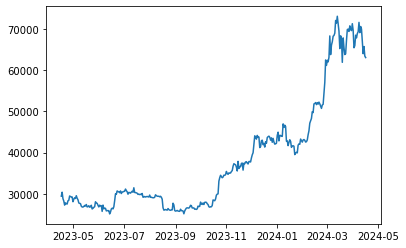

In [6]:
plot=pyplot.plot(x_value,y_value)

In [7]:
returns = np.log(y_value / y_value.shift(1))
returns = returns.fillna(0)

In [8]:
new["returns"]=returns

C:\Users\shupe\AppData\Local\Temp\ipykernel_7996\2739929621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["returns"]=returns


In [39]:
new["main_volatility"]=new["returns"].rolling(window=365,min_periods=1).std()*np.sqrt(365)

In [40]:
new["ewm_volatility"] = new["returns"].ewm(span=365).std()*np.sqrt(365)

In [41]:
new=new.fillna(0)

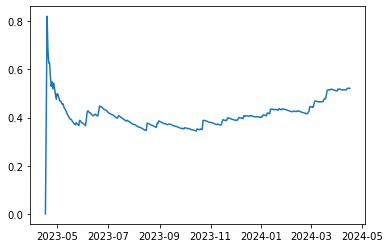

In [42]:
plot=pyplot.plot(x_value,new["ewm_volatility"])

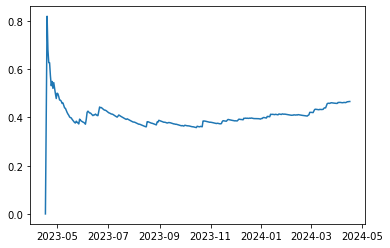

In [43]:
plot=pyplot.plot(x_value,new["main_volatility"])

In [44]:
new

,symbol,time,high,low,open,close,returns,main_volatility,ewm_volatility
0,BTC,2023-04-17,30331.32,29265.91,30322.37,29446.34,0.000000,0.000000,0.000000
1,BTC,2023-04-18,30485.26,29135.27,29446.34,30395.53,0.031726,0.428594,0.428594
2,BTC,2023-04-19,30419.74,28615.79,30395.53,28821.91,-0.053160,0.819440,0.820700
3,BTC,2023-04-20,29094.98,28007.09,28821.91,28248.11,-0.020109,0.680435,0.680435
4,BTC,2023-04-21,28365.20,27173.44,28248.11,27261.17,-0.035563,0.627311,0.626561
...,...,...,...,...,...,...,...,...,...
361,BTC,2024-04-12,71246.69,65257.57,70026.43,67158.30,-0.041820,0.462919,0.517104
362,BTC,2024-04-13,68422.60,61079.47,67158.30,64021.36,-0.047836,0.465002,0.521265
363,BTC,2024-04-14,65874.88,62229.80,64021.36,65765.64,0.026881,0.465022,0.520882
364,BTC,2024-04-15,66902.94,62328.07,65765.64,63447.27,-0.035888,0.465943,0.522586


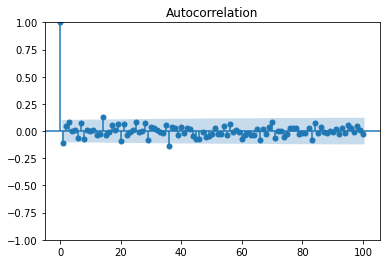

In [80]:
plot_acf(new["returns"],lags=100)
pyplot.show()

C:\Users\shupe\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


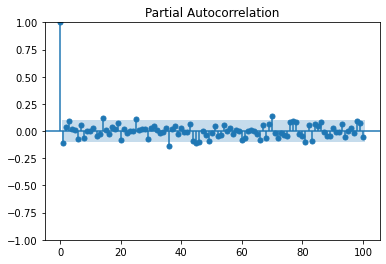

In [79]:
plot_pacf(new["returns"],lags=100)
pyplot.show()

In [51]:
squared_data = [x**2 for x in new["returns"]]
squared_array = np.array(squared_data)

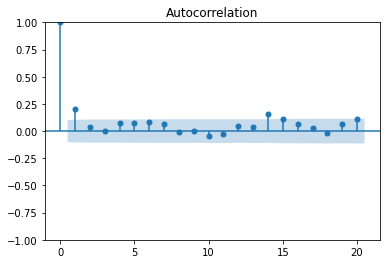

In [89]:
plot_acf(squared_array,lags=20)
pyplot.show()

In [23]:
n_test=round(len(squared_array)*.10)

In [82]:
train, test = new["returns"][:-n_test], new["returns"][-n_test:]

In [83]:
train

0      0.000000
1      0.031726
2     -0.053160
3     -0.020109
4     -0.035563
         ...   
324    0.035587
325    0.012215
326    0.019842
327    0.002588
328    0.008398
Name: returns, Length: 329, dtype: float64

In [84]:
test

329    0.043549
330   -0.009006
331    0.023085
332   -0.024241
333   -0.026546
334   -0.062901
335    0.046465
336   -0.011105
337   -0.087839
338    0.091499
339   -0.035460
340   -0.025927
341    0.002933
342    0.048845
343    0.039158
344    0.001401
345   -0.007972
346    0.019328
347   -0.012593
348   -0.003924
349    0.023882
350   -0.023073
351   -0.062461
352    0.007901
353    0.037737
354   -0.009726
355    0.015402
356    0.006415
357    0.032233
358   -0.035524
359    0.021453
360   -0.008562
361   -0.041820
362   -0.047836
363    0.026881
364   -0.035888
365   -0.005697
Name: returns, dtype: float64

In [133]:
model = arch_model(train, vol='ARCH', p=7,q=0)

In [134]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 11565085.045950316
Iteration:      2,   Func. Count:     27,   Neg. LLF: -537.8853816401677
Iteration:      3,   Func. Count:     40,   Neg. LLF: 694.8875910184382
Iteration:      4,   Func. Count:     51,   Neg. LLF: 1201.3876487327243
Iteration:      5,   Func. Count:     62,   Neg. LLF: -702.3163397649625
Iteration:      6,   Func. Count:     74,   Neg. LLF: 8911.60175768437
Iteration:      7,   Func. Count:     85,   Neg. LLF: -755.3213274615108
Iteration:      8,   Func. Count:     96,   Neg. LLF: -793.8010189185054
Iteration:      9,   Func. Count:    106,   Neg. LLF: -774.407770256101
Iteration:     10,   Func. Count:    118,   Neg. LLF: -776.2148193748851
Iteration:     11,   Func. Count:    130,   Neg. LLF: -793.4046598256919
Iteration:     12,   Func. Count:    141,   Neg. LLF: -760.2053252533567
Iteration:     13,   Func. Count:    153,   Neg. LLF: -794.2144757176959
Iteration:     14,   Func. Count:    163,   Neg. LLF: -

C:\Users\shupe\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005093. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [135]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                794.222
Distribution:                  Normal   AIC:                          -1570.44
Method:            Maximum Likelihood   BIC:                          -1536.28
                                        No. Observations:                  329
Date:                Wed, Apr 17 2024   Df Residuals:                      328
Time:                        19:30:28   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.0194e-03  1.015e-03      1.990  4.662e-02 [3.024e-05,4.009e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.6337e-04  7.410e-05      3.554  3.790e-04  [1.181e-04,4.086e-04]
alpha[1]       0.1881      0.109      1.722  8.502e-02   [-2.596e-02,  0.402]
alpha[2]       0.0176  3.852e-02      0.458      0.647 [-5.787e-02,9.312e-02]
alpha[3]   1.4207e-16  4.706e-02  3.019e-15      1.000 [-9.223e-02,9.223e-02]
alpha[4]       0.0885  8.542e-02      1.036      0.300   [-7.890e-02,  0.256]
alpha[5]   9.1099e-17  6.302e-02  1.445e-15      1.000      [ -0.124,  0.124]
alpha[6]   4.6388e-03  3.965e-02      0.117      0.907 [-7.307e-02,8.234e-02]
alpha[7]       0.2551      0.142      1.791  7.321e-02   [-2.399e-02,  0.534]
=============================================================================

Covariance estimator: robust
"""

In [137]:
yhat = model_fit.forecast(horizon=n_test)

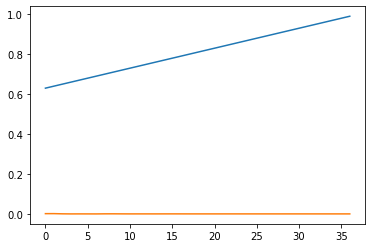

In [143]:
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

## METHOD TWO

C:\Users\shupe\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


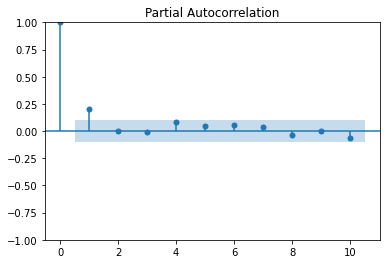

In [150]:
plot_pacf(new["returns"] **2,lags=10)
pyplot.show()

In [194]:
model_two=arch_model(new["returns"],p=1,q=1)

In [195]:
model_two_fit=model_two.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35202040123.169014
Iteration:      2,   Func. Count:     17,   Neg. LLF: 298.2035988785913
Iteration:      3,   Func. Count:     26,   Neg. LLF: 16781.120239989148
Iteration:      4,   Func. Count:     35,   Neg. LLF: -835.673873848992
Iteration:      5,   Func. Count:     42,   Neg. LLF: -842.3175625641273
Iteration:      6,   Func. Count:     49,   Neg. LLF: -844.0470951075752
Iteration:      7,   Func. Count:     55,   Neg. LLF: -850.9096011422052
Iteration:      8,   Func. Count:     61,   Neg. LLF: -850.9277620681362
Iteration:      9,   Func. Count:     66,   Neg. LLF: -850.9289260359817
Iteration:     10,   Func. Count:     71,   Neg. LLF: -850.9290039598573
Iteration:     11,   Func. Count:     76,   Neg. LLF: -850.9290087742997
Iteration:     12,   Func. Count:     80,   Neg. LLF: -850.9290087743436
Optimization terminated successfully    (Exit mode 0)
            Current function value: -850.9290087742997
            Itera

C:\Users\shupe\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005917. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [196]:
model_two_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                850.929
Distribution:                  Normal   AIC:                          -1693.86
Method:            Maximum Likelihood   BIC:                          -1678.25
                                        No. Observations:                  366
Date:                Wed, Apr 17 2024   Df Residuals:                      365
Time:                        20:03:50   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.6386e-03  1.151e-03      1.424      0.154 [-6.167e-04,3.894e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.0244e-04  6.161e-05      1.663  9.635e-02 [-1.831e-05,2.232e-04]
alpha[1]       0.1148  6.112e-02      1.878  6.031e-02   [-4.979e-03,  0.235]
beta[1]        0.7136      0.142      5.021  5.153e-07      [  0.435,  0.992]
=============================================================================

Covariance estimator: robust
"""

In [199]:
rolling_predictions=[]
test_size=365

for x in range(test_size):
    train_two=new["returns"][:-(test_size-x)] *100
    model_two= arch_model(train_two, p=7,q=7)
    model_two_fit=model_two.fit(disp="off")
    pred=model_two_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\shupe\anaconda3\lib\site-packages\arch\univariate\volatility.py:1197: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\shupe\anaconda3\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\shupe\anaconda3\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [200]:
rolling_predictions=pd.Series(rolling_predictions, index=new["returns"].index[-365:])

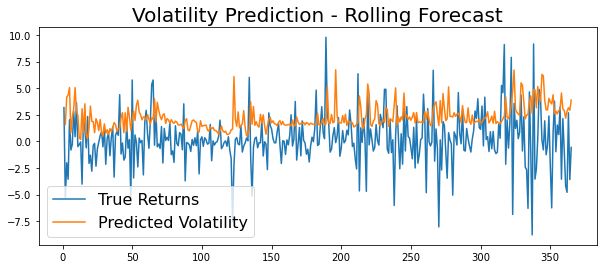

In [201]:
pyplot.figure(figsize=(10,4))
true, = pyplot.plot(new["returns"][-365:] *100)
preds, = pyplot.plot(rolling_predictions)
pyplot.title('Volatility Prediction - Rolling Forecast', fontsize=20)
pyplot.legend(['True Returns', 'Predicted Volatility'], fontsize=16)